**Proyecto House Prices Prediction**
Dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?utm_source=chatgpt.com 

Description:
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

1. IMPORTACIÓN DEL DATASET

In [ ]:
# Importamos librerías necesarias para el tratamiento
import pandas as pd
import numpy as np

In [ ]:
# Cargamos dataset
df = pd.read_csv('../Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Vemos las variables del dataset
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
# Vemos la dimensión y el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


2. ANÁLISIS EXPLORATORIO

In [ ]:
# importamos librerías necesarias para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

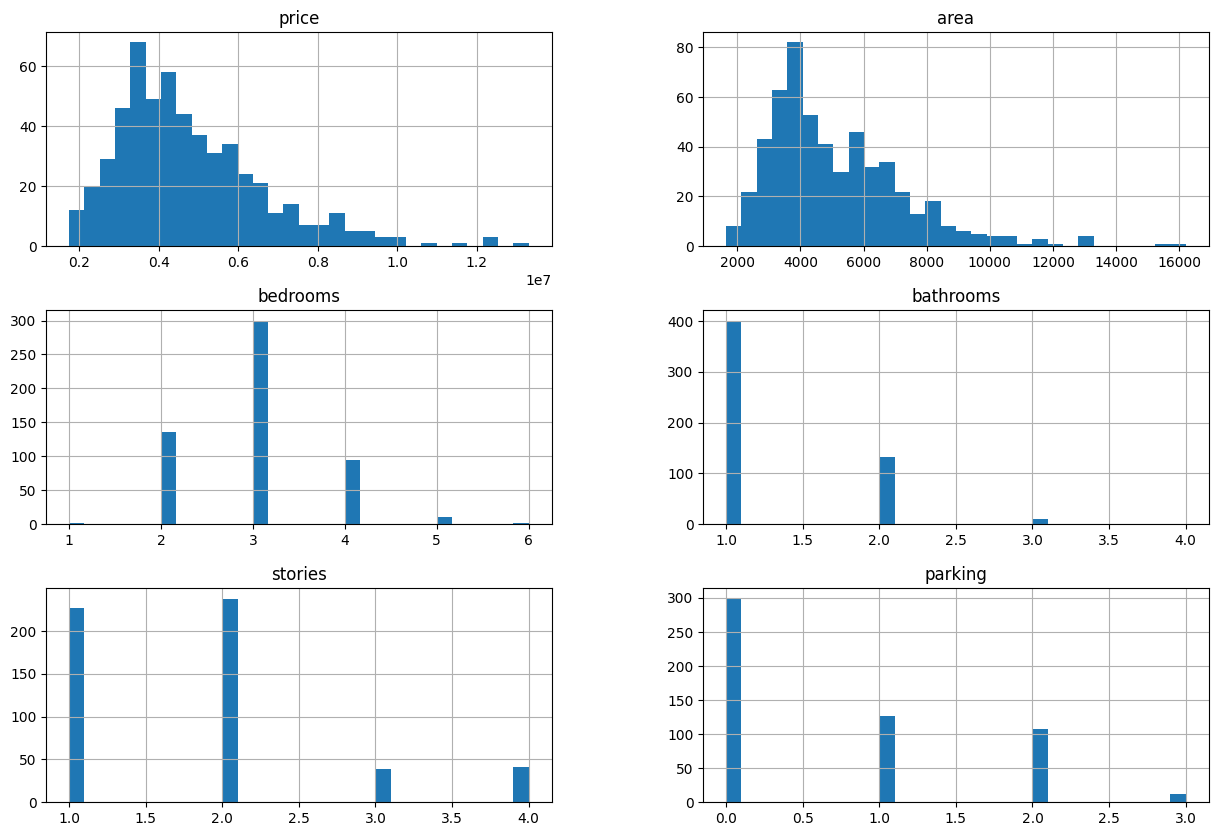

In [ ]:
# Vemos un histograma de las variables numéricas
# Plotting histograms and box-plots of all features
def plot_features(data):
    """ Plot histograms and box-plots for all numeric features in the dataset."""
    numeric_cols = data.select_dtypes(include='number').columns

    for col in numeric_cols:
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], bins=30, kde=True, color='skyblue')
        plt.title(f'Histogram: {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col], color='orange')
        plt.title(f'Boxplot: {col}')

        plt.tight_layout()
        plt.show()

plot_features(df)

Se puede apreciar que todas las varibles numéricas excepto bedrooms son asimétricas a la derecha por lo que la mayoría de las casas recogidas en el dataset tienen menor tamaño y menor números de habitaciones totales y, por lo tanto, menor precio. 

El número de bedrooms sigue una distribución normal centrada en 3.

In [ ]:
# Vemos los precios de las casas según el area
px.scatter(df, x='area', y='price', title='Precio de las casas según el área')

In [ ]:
# Vemos boxplot con area
px.box(df, x="stories", y="price", color="guestroom", title='Precio de las casas según el número de pisos')

In [ ]:
# Vemos el valor de las casas según el número de habitaciones y mainroad
px.box(df, x='bedrooms', y='price', title='Valor de las casas según el número de habitaciones', color="mainroad")

Se aprecia como el hecho de estar en una carretera principal aumenta el precio de las casas estando siempre el 75 % de estas por debajo del 50 % de las casas en carrteras principales. Esto se agrava para el caso de 5 habitaciones donde el máximo precio de las casas fuera de carreteras principales está por debajo del q1 de las que sí están en carreteras principales

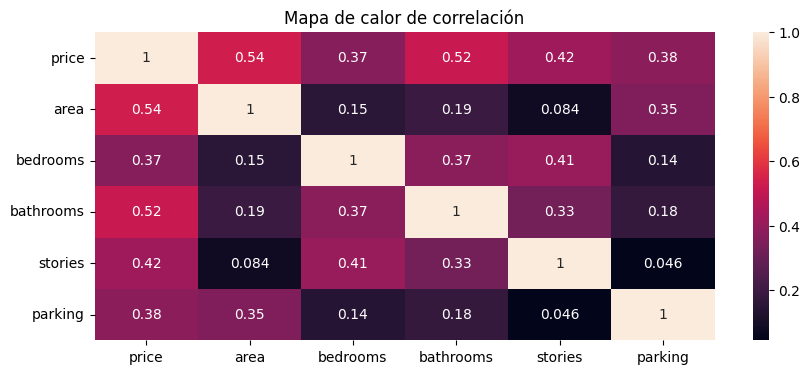

In [ ]:
# Mapa de calor de correlación
df_corr = df.select_dtypes(include="number")
corr = df_corr.corr()

plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True, )
plt.title('Mapa de calor de correlación')   
plt.show()

Se aprecia que las variables con mayor impacto en el precio son el area y el número de baños, aunque el resto de variables tienen importancia. 
En cuanto a la indepencia de las variables independientes, existe una correlación entre número de habitaciones, baños y plantas debido a que necesitas más espacio si quieres más cuartos y si tienes más cuartos necesitas más baños al ser más personas. 
También existe una correlación entre el área y el parking al necesitar un mayor área para poder tener parking.

In [ ]:
# Técnica de one hot encoding para variables categóricas
categorical_cols = ["bedrooms", "bathrooms", "stories"] + df.select_dtypes(include="object").columns.tolist()
df_encoded = pd.get_dummies(df, columns= categorical_cols, drop_first=True, dtype="int8")
df_encoded.head()

,price,area,parking,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_2,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,2,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,12250000,8960,3,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
2,12250000,9960,2,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0
3,12215000,7500,3,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0
4,11410000,7420,2,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0


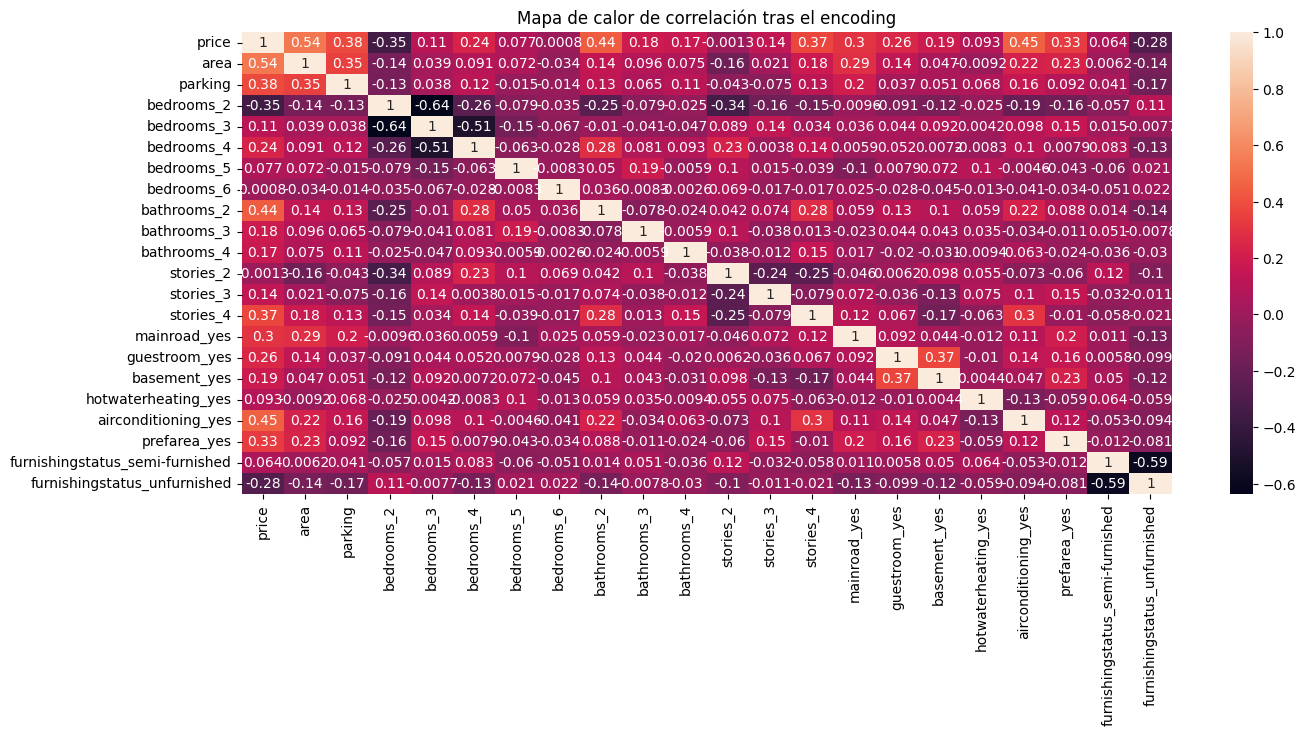

In [ ]:
# De nuevo mapa de calor de correlación tras el encoding
df_encoded_corr = df_encoded.corr()
plt.figure(figsize=(15,6))
sns.heatmap(df_encoded_corr, annot=True)
plt.title('Mapa de calor de correlación tras el encoding')
plt.show()

3. PREDICCION

3.1 TRATAMIENTO DE LOS DATOS Y ENTRENAMIENTO DEL MODELO

Primero se va a realizar sin estandarizar para realizar una comparación entre ambos resultados y ver las bondades de este tratamiento

In [ ]:
# Importamos librerías necesarias para el modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separamos variables independientes y dependientes
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Preparamos el modelo y entrenamos
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Realizamos predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo según MSE, RMSE y R2
mse =mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2}')

MSE: 1801821845241.0127, RMSE: 1342319.57642024, R2: 0.6435262035306222


In [ ]:
# Evaluamos el modelo mediante cross-validation
from sklearn.model_selection import cross_val_score

cross = cross_val_score(model, X, y, cv = 5, scoring="neg_mean_squared_error")
print("Los resultados del cross-validation son " + str(-cross) + "con media " + str(-cross.mean()))

Los resultados del cross-validation son [6.95894550e+12 9.53513419e+11 8.90420079e+11 8.85598776e+11
 1.08608866e+12]con media 2154913287913.853


In [ ]:
# Realizamos predicciones mediante cross-validation
from sklearn.model_selection import cross_val_predict

y_pred_cross = cross_val_predict(LinearRegression(), X, y, cv=5)
print(y_pred_cross.shape)
print(y.shape)

mse_cross = mean_squared_error(y, y_pred_cross)
rmse_cross = np.sqrt(mse_cross)
r2_cross = r2_score(y, y_pred_cross)

print("MSE = " + str(mse_cross) + " RMSE = " + str(rmse_cross) + " R2 = " + str(r2_cross))

(545,)
(545,)
MSE = 2154913287913.8533 RMSE = 1467962.2910394713 R2 = 0.38292206529160844


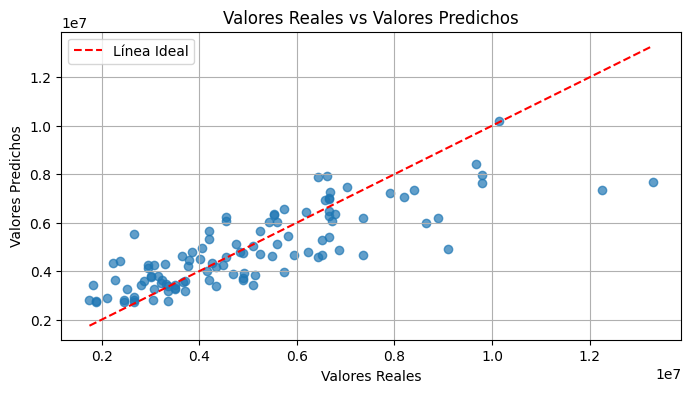

In [ ]:
# Realizamos la visualización de los valores reales vs predichos
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.grid()

x = np.linspace(np.min(y_test), np.max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--', label='Línea Ideal')
plt.legend()

plt.show()

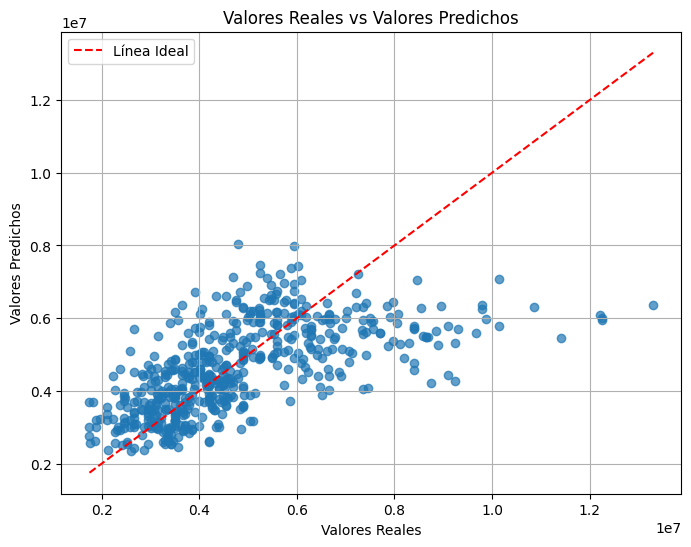

In [ ]:
# Realizamos la visualización de los valores reales vs predichos usando cross-validation para la predicción
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred_cross, alpha=0.7)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.grid()

x = np.linspace(np.min(y), np.max(y), 100)
plt.plot(x, x, color='red', linestyle='--', label='Línea Ideal')
plt.legend()

plt.show()

Se aprecia que a medida que los precios de la vivienda son más altos se tiene una peor predicción debido a una mejor cantidad de viviendas con esos precios

Realizamos la normalización según **StandardScaler**

In [ ]:
# Realizamos la estandarización de las variables
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Obtenemos las variables depqendientes e independientes
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"].to_numpy()

In [ ]:
# Obtenemos las variables de entrenamiento y prueba estandarizadas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42) 

# Variables independientes estandarizadas
scaler_X.fit(X_train)
X_train_std = scaler_X.transform(X_train)
X_test_std = scaler_X.transform(X_test)

# Variable dependiente estandarizada
scaler_y.fit(y_train.reshape(-1,1))
y_train_std = scaler_y.transform(y_train.reshape(-1,1)).flatten()  
y_test_std = scaler_y.transform(y_test.reshape(-1,1)).flatten()

In [ ]:
# Entrenamos el modelo
model_std = LinearRegression()
model_std.fit(X_train_std, y_train_std)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Realizamos predicciones y revertimos estandarización
y_pred_std = model_std.predict(X_test_std)

y_pred_std = scaler_y.inverse_transform(y_pred_std.reshape(-1,1)).flatten()

In [ ]:
# Realizamos mediciones de error
mse_std = mean_squared_error(y_test, y_pred_std)
rmse_std = np.sqrt(mse_std)
r2_std = r2_score(y_test, y_pred_std)
print(f'Standarized MSE: {mse_std}, RMSE: {rmse_std}, R2: {r2_std}')

Standarized MSE: 1801821845241.0142, RMSE: 1342319.5764202406, R2: 0.643526203530622


In [ ]:
# Obtenemos los coeficientes del modelo sin estandarizar y estandarizado
print("Coeficientes del modelo sin estandarizar", model.coef_)
print("Coeficientes del modelo sin estandarizar", model_std.coef_)


Coeficientes del modelo sin estandarizar [ 2.24747696e+02  2.04391824e+05  8.57149511e+04  2.54701802e+05
  3.23201743e+05  5.12072023e+05  1.01418022e+06  9.74372040e+05
  2.52096333e+06  4.83343112e+06  2.30251595e+05  6.09177235e+05
  1.40560374e+06  3.82493617e+05  2.34087528e+05  4.08734644e+05
  7.50051617e+05  7.80274453e+05  6.47592488e+05 -1.01152825e+05
 -4.21282517e+05]
Coeficientes del modelo sin estandarizar [ 0.2818095   0.09940004  0.02126468  0.07221912  0.06946356  0.03913786
  0.0390278   0.2372644   0.13687922  0.13167377  0.06493914  0.08781454
  0.20571709  0.07607728  0.05109356  0.11157885  0.09349788  0.2050229
  0.15612564 -0.02852869 -0.11137005]


In [ ]:
# Serie con coeficientes del modelo estandarizado
coefs = pd.Series(model_std.coef_, index=X_train.columns)

# Importancia según el valor absoluto del coeficiente
importancia = coefs.abs().sort_values(ascending=False)

print("Coeficientes ordenados por importancia:")
print(importancia)


Coeficientes ordenados por importancia:
area                               0.281809
bathrooms_2                        0.237264
stories_4                          0.205717
airconditioning_yes                0.205023
prefarea_yes                       0.156126
bathrooms_3                        0.136879
bathrooms_4                        0.131674
basement_yes                       0.111579
furnishingstatus_unfurnished       0.111370
parking                            0.099400
hotwaterheating_yes                0.093498
stories_3                          0.087815
mainroad_yes                       0.076077
bedrooms_3                         0.072219
bedrooms_4                         0.069464
stories_2                          0.064939
guestroom_yes                      0.051094
bedrooms_5                         0.039138
bedrooms_6                         0.039028
furnishingstatus_semi-furnished    0.028529
bedrooms_2                         0.021265
dtype: float64


Se demuestra que realizar una estandarización para modelos de regresión lineal no cambia las predicciones realizadas ni las métricas de error del modelo debido a que el modelo es invariante a la escala de las variables independientes.
Sin embargo esto ayuda a la interpretación del modelo, al obtener mejores insights de los coeficientes del modelo. En este caso se aprecia que la variable que tiene mayor peso en la predicción es el área y si tiene 2 baños o no.

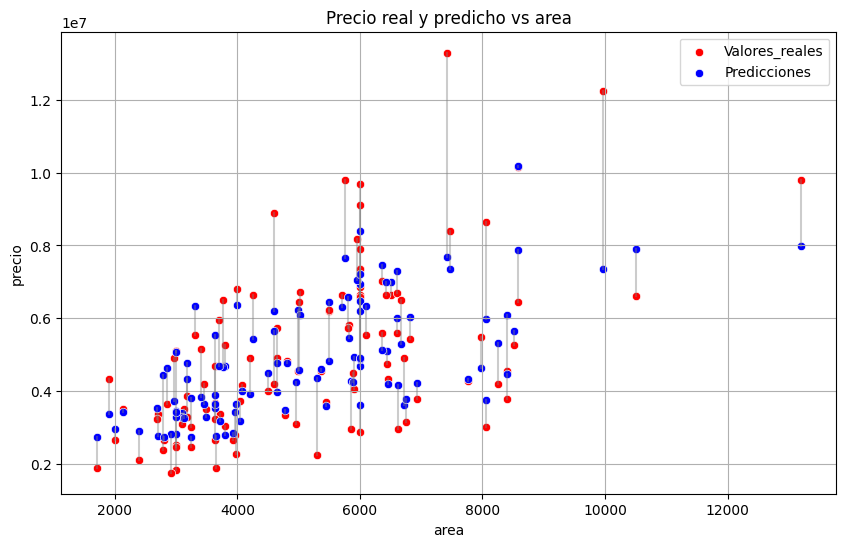

In [ ]:
# Realizamos una comparació de los precios reales y predichos vs area con scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x = X_test["area"], y = y_test, label="Valores_reales", color="red")
sns.scatterplot(x = X_test["area"], y = y_pred_std, label="Predicciones", color="blue")

for x, y_real, y_pred in zip(X_test["area"], y_test, y_pred_std):
    plt.plot([x, x], [y_real, y_pred], color="grey", alpha=0.4)

plt.title("Precio real y predicho vs area")
plt.xlabel("area")
plt.ylabel("precio")
plt.grid()
plt.legend()
plt.show()